# Space Data Exploration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [2]:
# 2 datasets have been loaded into their own variables.
astrns = pd.read_csv('astronaut_data/astronauts.csv')
missns = pd.read_csv('astronaut_data/missions.csv')

## Missions File

In [3]:
# Checking the columns of the dataset
missns.columns
#Cost column has a space in the beginning so this needs to be corrected to avoid possible errors/delays.

Index(['Unnamed: 0', 'ID', 'Company Name', 'Location', 'Date', 'Detail',
       'Status Rocket', ' Cost', 'Status Mission'],
      dtype='object')

In [4]:
# Renaming cost column. Specifying inplace=True is necessary for this action to be made permanent to the dataframe.
missns.rename(columns = {' Cost':'Cost'}, inplace = True)

In [5]:
# Checking for possible NA values
# missns.isna().any() // Possible method of checking for na values. Will give boolean value for each column whether they have NA.
missns.columns[missns.isna().any()].tolist() # List of columns which have NA values. Cost column has NA values
missns['Cost'].fillna(0, inplace = True) # NA values filled with zeros.

''

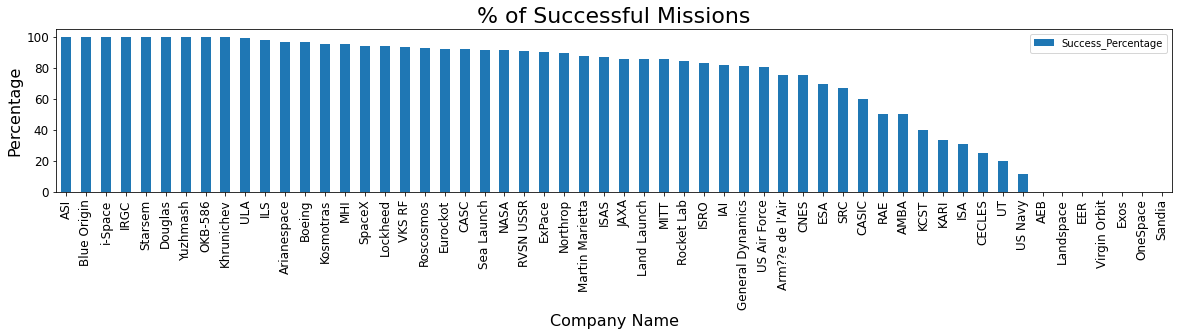

In [22]:
# PERCENTAGE OF SUCCESSFUL MISSIONS

# Which company had the highest number of missions
msn_cnt = pd.DataFrame(missns['Company Name'].value_counts()) # Count occurences of Missions attempted
msn_cnt.rename(columns = {'Company Name':'Total_Missions'}, inplace = True) # Rename for easier reading/comprehension

# Number of successful Missions
# Selecting 'Company Name' & 'ID' if 'Status Mission' is equal to 'Success'. This is then grouped by 'Company Name', counting each Companies rows.
msn_scs = missns[['Company Name', 'ID']][missns['Status Mission']=='Success'].groupby('Company Name').count().sort_values(by = 'ID', ascending = False)
msn_scs.rename(columns = {'ID':'Successful_Missions'}, inplace = True)

# Calculate Percentage of Successful Missions 
# The 2 dataframes have been joined to create one large dataframe.
msn_scs_percent = msn_cnt.join(msn_scs) 
# A new column has been added to this dataframe based on 2 existing colummns. 
msn_scs_percent['Success_Percentage'] = (msn_scs_percent['Successful_Missions'] / msn_scs_percent['Total_Missions'])*100 
msn_scs_percent = msn_scs_percent.fillna(0)
# .plot method allows for dataframe to be visualised through desired chart type. .bar specifies a bar chart. 'Success_Percentage' is the variable which will be plotted against the Index. The data is then sorted based on the methods inside .sort_values.  
msn_scs_percent.sort_values(by = 'Success_Percentage',ascending=False).plot.bar(y = 'Success_Percentage', figsize=(20,3)) 

# Labelling the title, axes and ticks for the plot. 
plt.title('% of Successful Missions', size=22)
plt.xlabel('Company Name', size=16)
plt.xticks(size=12)
plt.ylabel('Percentage', size=16)
plt.yticks(size=12)
;


# Plot using Plotly as is more interactive and intuitive so data can be explored further using Python. As visualisation will be used for report, interactivity is not a priority.
#fig = px.bar(msn_scs_percent, y ='Success_Percentage', color='Success_Percentage', labels={"index": "Company Name"}, color_continuous_scale='Sunset', width=1100, height=450)
#fig.update_xaxes(categoryorder= 'total descending')

C:\Users\minha\AppData\Local\Temp/ipykernel_7756/1071720202.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  missns[col] = missns[col].str.replace('[$,]', '')


''

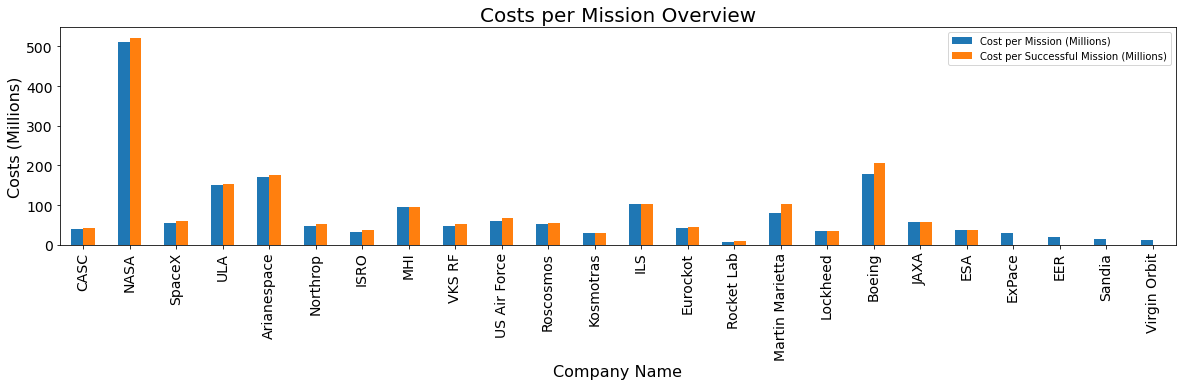

In [23]:
# COSTS SUMMARY (In order to identify any relationship between figures) provides deeper insight into the data
# In order to do this, rows which had NA or 0 values for the 'COST' column will be dropped/removed to avoid the data being skewed which could provide incorrect information. 
# The traditional method using .astype() did not work straight away as there were values with commas within the column, thus, I have used a for loop and replace() to replace/ignore any such values.
p = ['Cost']
for col in p:
    missns[col] = missns[col].str.replace('[$,]', '')
    
# The 'Cost' column has a lot of missing or '0 'values and so these rows will be dropped as they can skew the data to give misleading results.
# First a copy of the dataframe was made to be used for this visualisation.
m= missns.copy()
m.dropna(axis=0, how='any', inplace=True)

    
# .astype converts columns type into specified 
m["Cost"]=m["Cost"].astype(float, errors = 'raise') # After replacing the commas, the astype() works now. 

# .agg allows for operations to be performed over the specified dataframe. In this case, the 'Cost' column. 
msn_ttl_cst = pd.DataFrame(m.groupby('Company Name').agg({'Cost':'sum'}).sort_values(by = 'Cost', ascending=False))
msn_ttl_cst['No. of Missions'] = m['Company Name'].value_counts()
msn_ttl_cst['No. of Successful Missions'] = m[['Company Name', 'ID']][m['Status Mission']=='Success'].groupby('Company Name').count().sort_values(by = 'ID', ascending = False)
msn_ttl_cst['% of Successful Mission'] = msn_ttl_cst['No. of Successful Missions'] / msn_ttl_cst['No. of Missions'] *100
msn_ttl_cst['Cost per Mission (Millions)'] = msn_ttl_cst['Cost'] / msn_ttl_cst['No. of Missions']
msn_ttl_cst['Cost per Successful Mission (Millions)'] = msn_ttl_cst['Cost'] / msn_ttl_cst['No. of Successful Missions']
msn_ttl_cst.fillna(0, inplace=True)
msn_ttl_cst.drop('RVSN USSR', inplace=True) # This company has an extremely high value compared to others, therefore it has been dropped to allow for better analysis to be performed and shown.
msn_ttl_cst.sort_values(by = 'No. of Missions',ascending=False).plot.bar(y=['Cost per Mission (Millions)' ,'Cost per Successful Mission (Millions)'], figsize=(20,4))
plt.title('Costs per Mission Overview', fontsize=20)
plt.xlabel('Company Name', fontsize=16)
plt.ylabel('Costs (Millions)', fontsize=16)
plt.xticks(size=14)
plt.yticks(size=14)
;

# Again, an interactive scatter plot would not provide much use in a physical report and a double bar chart would allow for better comparisons while scatter plots help to show possible correlations/relationships.
#fig = px.scatter(msn_ttl_cst, x = 'Cost per Mission (Millions)', y='% of Successful Mission')
#fig.show()

C:\Users\minha\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


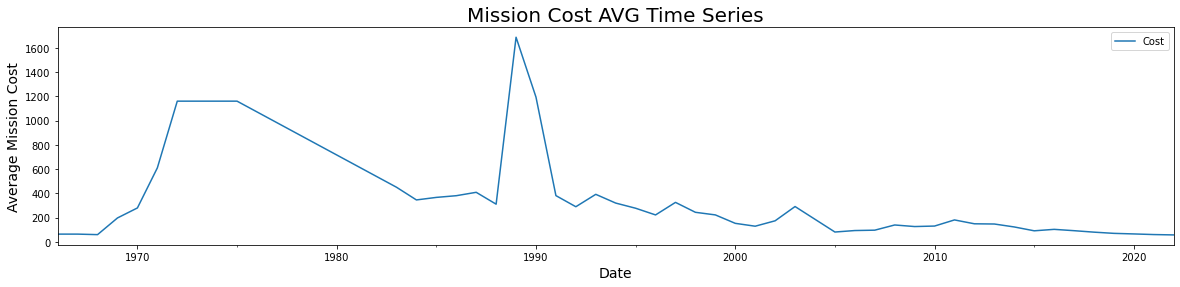

In [24]:
#AVERAGE MISSION COST TIME SERIES

missns['Date'] = pd.to_datetime(missns['Date'], utc=True) # Convert Date column to datetime format
n= missns.copy() # .copy duplicates specified dataframe.
n.dropna(axis=0, how='any', inplace=True) # dropna allows for removal of rows where there are NA values. how specifies if all colummns have to be NA (all) or if just 1 (any). 
n["Cost"]=n["Cost"].astype(float, errors = 'raise') 

msn_cst = n.groupby(n.Date.dt.to_period('3Y')).agg({'Cost':'mean'}) # dt.to_period allows for the series Date to be casted to an index at a specific frequency. Frequencies can be specified within brackets. '3Y' selects the year from date. 
msn_cst.plot(figsize=(20,4))
plt.title('Mission Cost AVG Time Series', size=20)
plt.xlabel('Date', size=14)
plt.ylabel('Average Mission Cost', size=14);

C:\Users\minha\anaconda3\lib\site-packages\pandas\core\arrays\datetimes.py:1143: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


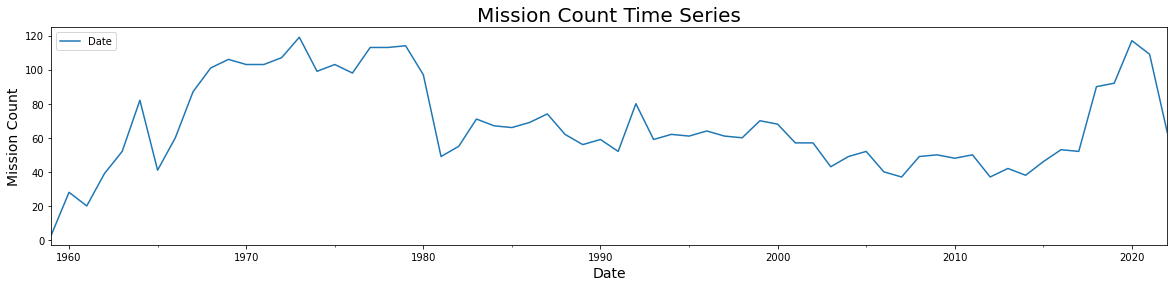

In [25]:
# WHICH YEARS HAD THE MOST MISSIONS & HOW IT EVOLVED OVER TIME
missns['Date'] = pd.to_datetime(missns['Date'], utc=True) # Convert Date column to datetime format
msn_yrs = pd.DataFrame(missns['Date'].groupby(missns.Date.dt.to_period('3Y')).agg('count'))
msn_yrs.plot(figsize=(20,4))
plt.title('Mission Count Time Series', size=20)
plt.xlabel('Date', size=14)
plt.ylabel('Mission Count', size=14);

## Astronauts File

In [10]:
astrns.columns # Check column names
# We can see column 'field21' has been incorrectly named; this needs to be named 'eva'
astrns.rename(columns = {'field21': 'eva'}, inplace=True)

In [11]:
astrns.columns[astrns.isna().any()].tolist() # Which columns have NA values. Can remove these rows if these columns are to be used in visualisations as they may cause data to be skewed.

['original_name',
 'selection',
 'mission_title',
 'ascend_shuttle',
 'descend_shuttle']

In [12]:
astrns['sex'].value_counts() # No. of Instances of which gender went into space.

male      1134
female     143
Name: sex, dtype: int64

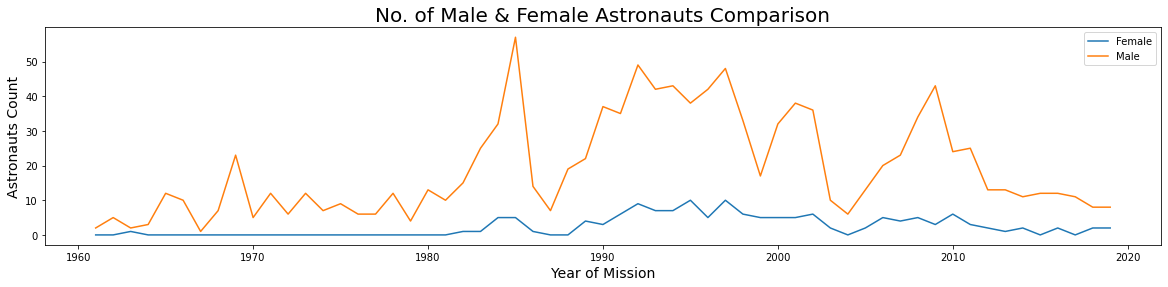

In [26]:
# No. OF MALE AND FEMALE ASTRONAUTS COMPARISON 
female_male = astrns.groupby(['year_of_mission','sex']).agg({'sex':'count'}).unstack().fillna(0).plot(figsize=(20,4)) # Unstack pivots the dataframe, which provides NA values, that are then filled with 0s. This now allows both male and female columns to follow the same years and the any NA values have been filled with zeros. 
plt.title('No. of Male & Female Astronauts Comparison', size=20)
plt.xlabel('Year of Mission', size=14)
plt.ylabel('Astronauts Count', size=14)
female_male.legend(['Female', 'Male']);

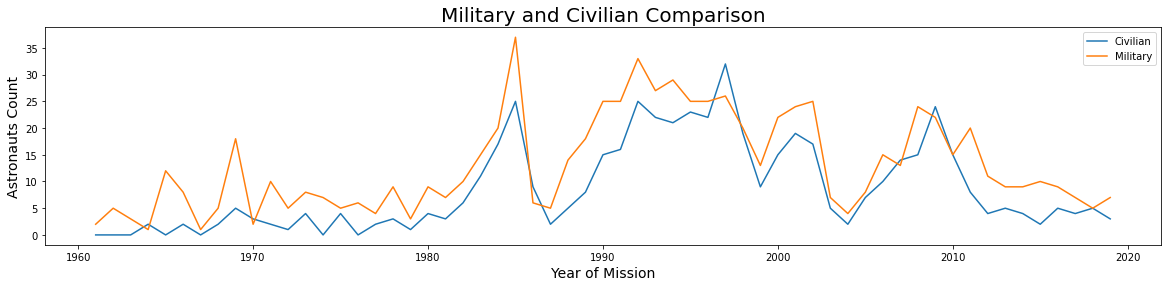

In [27]:
# CCHECK WHETHER MILITARY STATUS PLAYS A PART IN THE LIKELIHOOD OF BEING SELECTED AND IF THERE IS ANY PREFERENCE

military_civilian = astrns.groupby(['year_of_mission','military_civilian']).agg({'military_civilian':'count'}).unstack().fillna(0).plot(figsize=(20,4))
plt.title('Military and Civilian Comparison', size=20)
plt.xlabel('Year of Mission', size=14)
plt.ylabel('Astronauts Count', size=14)
military_civilian.legend(['Civilian', 'Military']);

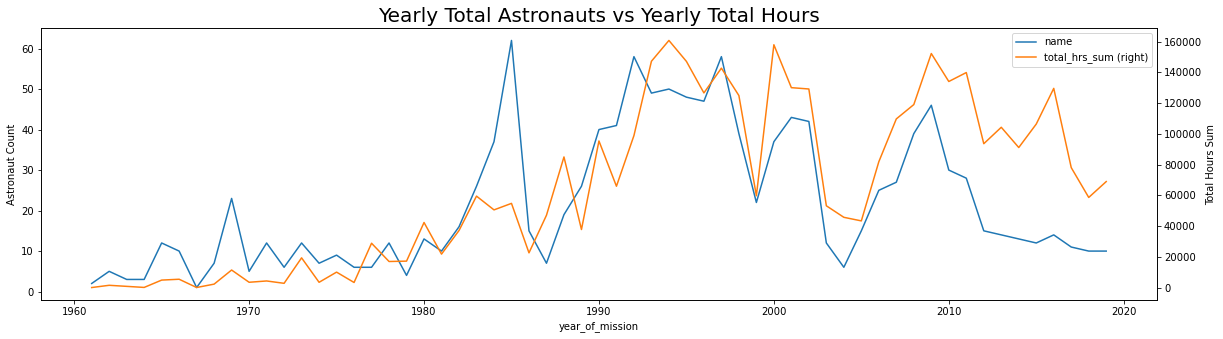

In [28]:
# YEARLY ASTRONAUTS AND TOTAL HOURS COMPARISON

ax = astrns[['name', 'year_of_mission']].groupby('year_of_mission').count().plot(figsize=(20,4), ylabel='Astronaut Count') # ax helps to specify a figure subplot which can references later to be added onto. 
astrns.groupby('year_of_mission').agg({'total_hrs_sum':'sum'}).plot(figsize=(20,5),secondary_y=True, ax=ax) # The secondary_y method allows for a secondary y-axis to be added for this visualisation as the scales for the 2 trend lines in this graph are vastly different. ax=ax allows for this plot to be added onto the same axis. 
plt.title('Yearly Total Astronauts vs Yearly Total Hours', size=20)
plt.xlabel('Year', size=14)
plt.ylabel('Total Hours Sum');

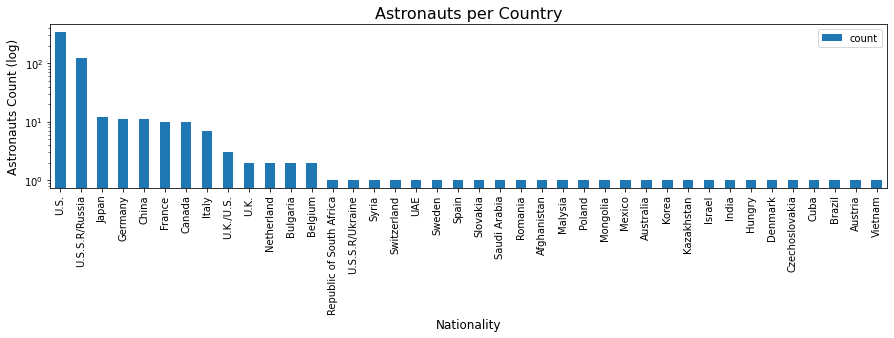

In [29]:
# NUMBER OF ASTRONAUTS per NATIONALITY
astrns_country = astrns.groupby(['name', 'nationality']).agg({'nationality':'count'}).rename(columns={'nationality':'count'})
astrns_country = astrns_country.groupby('nationality').count()
astrns_country.sort_values(by='count', ascending=False).plot.bar(figsize=(15,3))
plt.yscale('log') # Scaling the axis with 'log' allows for the data to be more comprehendable as some figures are extremely large with others extremely low.
plt.title('Astronauts per Country', fontsize=16)
plt.xlabel('Nationality', fontsize=12)
plt.ylabel('Astronauts Count (log)', fontsize=12);       